<a href="https://colab.research.google.com/github/sunonmountain/Data-Science-Projects-Python/blob/main/obesity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Obesity or CVD risk (Classify/Regressor/Cluster)

## About Dataset

The data consist of the estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition , data was collected using a web platform with a survey where anonymous users answered each question, then the information was processed obtaining 17 attributes and 2111 records.
The attributes related with eating habits are: Frequent consumption of high caloric food (FAVC), Frequency of consumption of vegetables (FCVC), Number of main meals (NCP), Consumption of food between meals (CAEC), Consumption of water daily (CH20), and Consumption of alcohol (CALC). The attributes related with the physical condition are: Calories consumption monitoring (SCC), Physical activity frequency (FAF), Time using technology devices (TUE), Transportation used (MTRANS)
variables obtained :
Gender, Age, Height and Weight.

NObesity values are:

•Underweight Less than 18.5
•Normal 18.5 to 24.9
•Overweight 25.0 to 29.9
•Obesity I 30.0 to 34.9
•Obesity II 35.0 to 39.9
•Obesity III Higher than 40

The data contains numerical data and continous data, so it can be used for analysis based on algorithms of classification, prediction, segmentation and association. Data is available in CSV format.

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report


## Importing the dataset

Read in the csv file into obesity_data as a dataframe

In [2]:
obesity_data = pd.read_csv("ObesityDataSet.csv")

In [3]:
obesity_data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## Data Preprocessing

In [4]:
obesity_data.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [5]:
#count number of duplicate rows
len(obesity_data)-len(obesity_data.drop_duplicates())

24

In [6]:
# Selecting duplicate rows except first
# occurrence based on all columns
duplicate = obesity_data[obesity_data.duplicated()]

print("Duplicate Rows :")

# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
98,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
106,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
174,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
179,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
184,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
209,Female,22.0,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
309,Female,16.0,1.66,58.0,no,no,2.0,1.0,Sometimes,no,1.0,no,0.0,1.0,no,Walking,Normal_Weight
460,Female,18.0,1.62,55.0,yes,yes,2.0,3.0,Frequently,no,1.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight
467,Male,22.0,1.74,75.0,yes,yes,3.0,3.0,Frequently,no,1.0,no,1.0,0.0,no,Automobile,Normal_Weight
496,Male,18.0,1.72,53.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight


Given the number of rows in the data. There is possibility that the duplicates refer to different people of similar characteristics. To confirm this I would require the name column, which has not been provided.

<ipython-input-7-1072f872f4d1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = obesity_data.corr()


<Axes: >

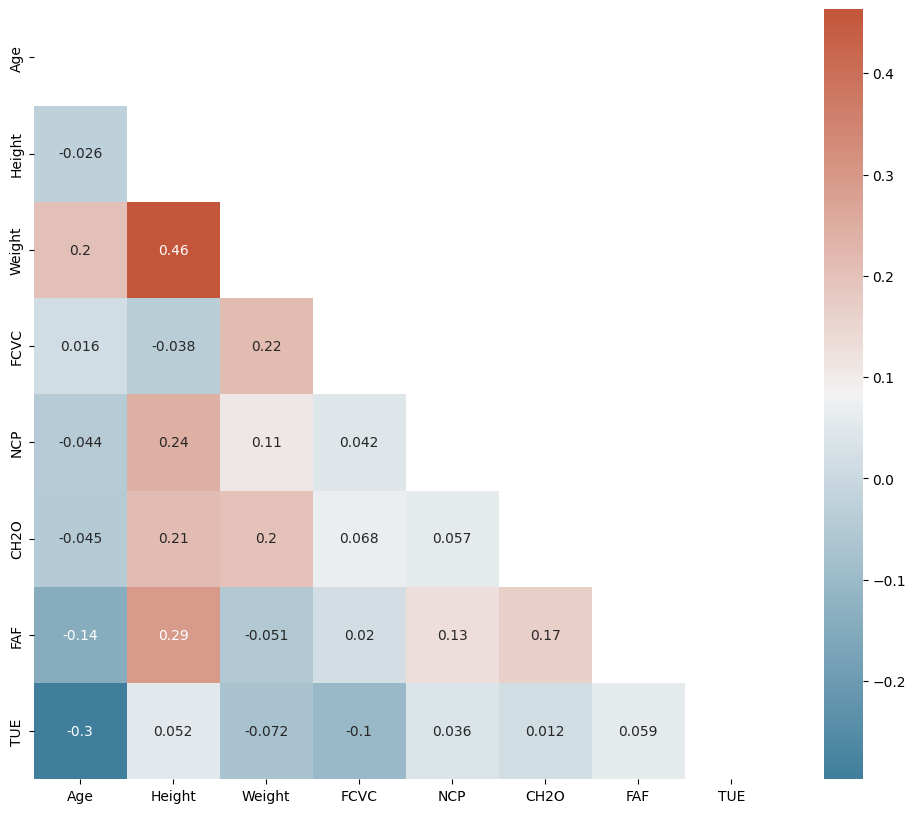

In [7]:


# Correlation between different variables
#
corr = obesity_data.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(12, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [8]:
corr

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,1.000000,-0.025958,0.202560,0.016291,-0.043944,-0.045304,-0.144938,-0.296931
Height,-0.025958,1.000000,0.463136,-0.038121,0.243672,0.213376,0.294709,0.051912
Weight,0.202560,0.463136,1.000000,0.216125,0.107469,0.200575,-0.051436,-0.071561
FCVC,0.016291,-0.038121,0.216125,1.000000,0.042216,0.068461,0.019939,-0.101135
NCP,-0.043944,0.243672,0.107469,0.042216,1.000000,0.057088,0.129504,0.036326
CH2O,-0.045304,0.213376,0.200575,0.068461,0.057088,1.000000,0.167236,0.011965
FAF,-0.144938,0.294709,-0.051436,0.019939,0.129504,0.167236,1.000000,0.058562
TUE,-0.296931,0.051912,-0.071561,-0.101135,0.036326,0.011965,0.058562,1.000000


## Encoding of Category Columns

In [9]:

category_columns = ['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS']
obesity_data_encoded = pd.get_dummies(obesity_data,columns=category_columns, drop_first=True)

In [10]:
obesity_data_encoded.shape

(2111, 24)

## Feature Scaling

In [11]:

feature_scale_columns = ['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
obesity_data_encoded[feature_scale_columns] = sc.fit_transform(obesity_data_encoded[feature_scale_columns])

In [12]:
obesity_data_encoded.shape

(2111, 24)

In [13]:
obesity_data_encoded.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Male,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997,Normal_Weight,0,...,0,0,0,0,0,1,0,0,1,0
1,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625,Normal_Weight,0,...,0,1,1,0,1,0,0,0,1,0
2,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997,Normal_Weight,1,...,0,0,0,1,0,0,0,0,1,0
3,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625,Overweight_Level_I,1,...,0,0,0,1,0,0,0,0,0,1
4,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625,Overweight_Level_II,1,...,0,0,0,0,1,0,0,0,1,0


In [14]:
X = obesity_data_encoded.drop("NObeyesdad",axis=1)
y = obesity_data_encoded["NObeyesdad"]

In [15]:
# Get unique labels from dataset
unique_labels = np.unique(y)

In [16]:
# Binarize the labels (one-hot encoding for multi-class AUC)
y_bin = label_binarize(y, classes=unique_labels)

## Splitting the dataset into the Training set and Test set

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.3, random_state=42)


In [18]:
X_train

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
1930,0.263145,-0.791780,0.719595,1.088342,0.404153,-0.860402,-1.072747,0.009242,0,1,...,0,0,0,0,1,0,0,0,1,0
1803,0.265964,-0.486235,0.967996,1.088342,0.404153,1.249987,-1.188039,-0.853256,0,1,...,0,0,0,0,1,0,0,0,1,0
1198,-0.994977,0.519063,-0.008169,0.914235,0.404153,1.195866,0.246392,-1.018806,1,1,...,0,0,0,0,1,0,0,0,1,0
15,-0.364507,-0.017981,-0.786178,1.088342,0.404153,-0.013073,1.163820,0.561997,0,1,...,0,0,1,0,1,0,0,0,1,0
816,-0.135710,-0.337151,-0.442470,-0.785019,0.404153,-0.013073,-1.036152,2.177807,1,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1.257405,0.571152,1.279847,1.027083,0.404153,0.851855,-0.064653,1.119226,1,1,...,0,0,0,0,1,0,0,0,0,0
1095,-0.206889,0.185497,-0.187745,-0.785019,-1.229118,-0.991769,-0.143904,0.581680,1,1,...,0,0,0,0,1,0,0,0,1,0
1130,-0.208489,-0.553986,-0.251521,-0.785019,0.404153,-0.013073,-1.015273,2.204618,0,1,...,0,0,0,0,0,1,0,0,1,0
1294,-0.206889,-0.788028,-0.079743,-0.675077,0.355306,0.004218,-0.187254,-0.044351,0,1,...,0,0,0,0,0,1,0,0,1,0


In [19]:
y_train

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

## Training the Kernel SVM model on the Training set

In [20]:
svm_model = SVC(kernel = 'rbf', C = 0.75, gamma= 0.1, random_state = 0, probability=True)

In [21]:
# Use OneVsRestClassifier for multi-class AUC
model = OneVsRestClassifier(svm_model)


In [22]:
# Train the model
model.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(C=0.75, gamma=0.1, probability=True,
                                  random_state=0))

## Predicting the Test set results

In [23]:
# Predict probabilities for each class on the test set
y_score = model.predict_proba(X_test)


In [24]:
# Predict the classes
y_pred = model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Convert one-hot encoded true labels to class labels
y_true_labels = np.argmax(y_test, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
print("\nConfusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_true_labels, y_pred_labels, target_names=unique_labels)




Confusion Matrix:
 [[84  2  0  0  0  0  0]
 [75 17  0  0  0  0  1]
 [30  0 70  2  0  0  0]
 [ 0  0  2 86  0  0  0]
 [ 1  0  0  0 97  0  0]
 [63  2  0  0  0 23  0]
 [45  0  1  0  0  1 32]]


In [25]:
# Calculate AUC for each class
for i, label in enumerate(unique_labels):
    auc = roc_auc_score(y_test[:, i], y_score[:, i])
    print(f"AUC for {label}: {auc}")

AUC for Insufficient_Weight: 0.9955652690544898
AUC for Normal_Weight: 0.9500725458628982
AUC for Obesity_Type_I: 0.9751216275984078
AUC for Obesity_Type_II: 0.9993964368964368
AUC for Obesity_Type_III: 1.0
AUC for Overweight_Level_I: 0.9555860805860805
AUC for Overweight_Level_II: 0.9560725282244269


In [26]:
# Average AUC across all classes
average_auc = np.mean([roc_auc_score(y_test[:, i], y_score[:, i]) for i in range(len(unique_labels))])
print(f"\nAverage AUC: {average_auc}")


Average AUC: 0.9759734983175343


In [27]:
print(class_report)

                     precision    recall  f1-score   support

Insufficient_Weight       0.28      0.98      0.44        86
      Normal_Weight       0.81      0.18      0.30        93
     Obesity_Type_I       0.96      0.69      0.80       102
    Obesity_Type_II       0.98      0.98      0.98        88
   Obesity_Type_III       1.00      0.99      0.99        98
 Overweight_Level_I       0.96      0.26      0.41        88
Overweight_Level_II       0.97      0.41      0.57        79

           accuracy                           0.65       634
          macro avg       0.85      0.64      0.64       634
       weighted avg       0.86      0.65      0.65       634

